In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

from lint.models import Token

def token_series(token, *args, **kwargs):
    
    series = Token.token_series(token, *args, **kwargs)
    
    total_count = sum(series.values())
    
    f_obs = np.zeros(100)
    
    for offset, count in series.items():
        f_obs[offset] = count
        
    return f_obs

In [3]:
def plot_time_slices(token, y1=1840, y2=2000, w=20):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    cm = plt.get_cmap('plasma')
    
    years = range(y1, y2, w)
    
    colors = [
        cm(1.*i/len(years))
        for i in range(len(years))
    ]
    
    ax.set_color_cycle(colors)
    
    lines = []
    for y in years:
        
        # Plot the raw series.
        Y = token_series(token, year1=y, year2=y+w)
        line, = ax.plot(Y, label=y)
        lines.append(line)
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
        
    print(token)
    plt.show()

had


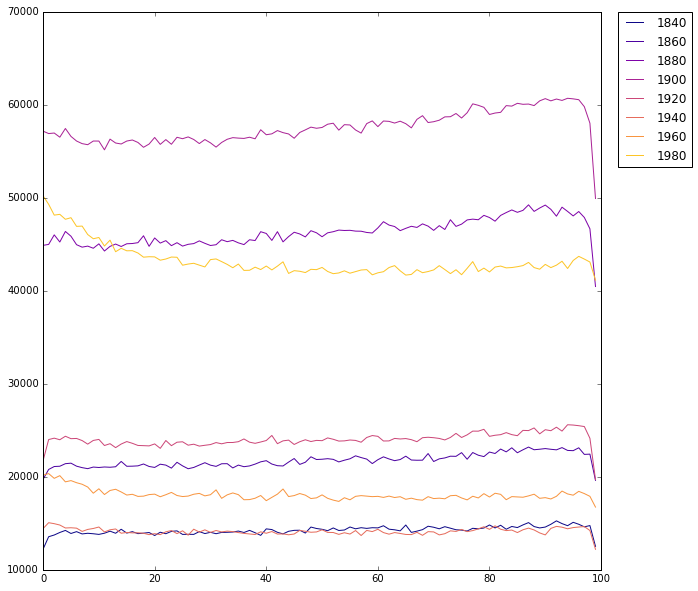

In [4]:
plot_time_slices('had')

In [6]:
s1840 = token_series('had', year1=1840, year2=1860)
s1980 = token_series('had', year1=1980, year2=2000)

s1840_total = sum(s1840)
s1980_total = sum(s1980)

In [7]:
print(s1840_total, s1980_total)

1424708.0 4322456.0


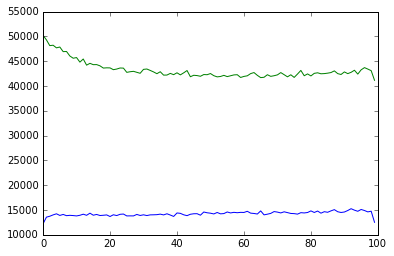

In [8]:
plt.plot(s1840)
plt.plot(s1980)
plt.show()

In [26]:
samples = np.random.choice(
    range(100),
    s1840_total,
    p=list(s1980 / s1980.sum()),
)

downsampled = np.zeros(100)

for s in samples:
    downsampled[s] += 1

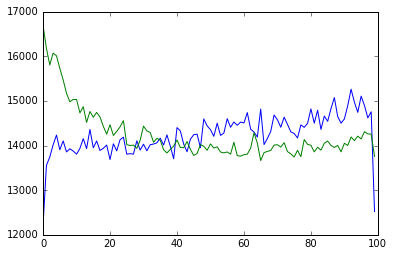

In [27]:
plt.plot(s1840)
plt.plot(downsampled)
plt.show()